In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


🌡️ مشروع: نظام تحكم ضبابي لتحديد درجة حرارة التكييف المثالية
🎯 الهدف:
بناء نظام استنتاج ضبابي (Fuzzy Inference System) لتحديد درجة حرارة التكييف المثالية بناءً على:

درجة الحرارة الخارجية
الرطوبة
عدد الأشخاص في الغرفة
الناتج هو درجة حرارة التكييف المقترحة (مثل: "بارد"، "معتدل"، "دافئ").

🧠 لماذا هذا المشروع؟
يمكن استخدامه في أنظمة المنازل الذكية.
يُظهر كيف يمكن للمنطق الضبابي التعامل مع بيانات غير دقيقة أو تامة.
مناسب للمشاريع العملية في الجامعات.
✅ المتطلبات:
scikit-fuzzy (ثبتها سابقًا)
numpy
matplotlib

درجة حرارة التكييف المقترحة: 22.070539419087137


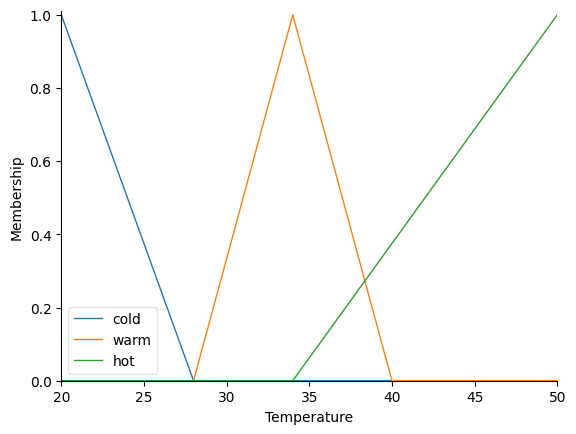

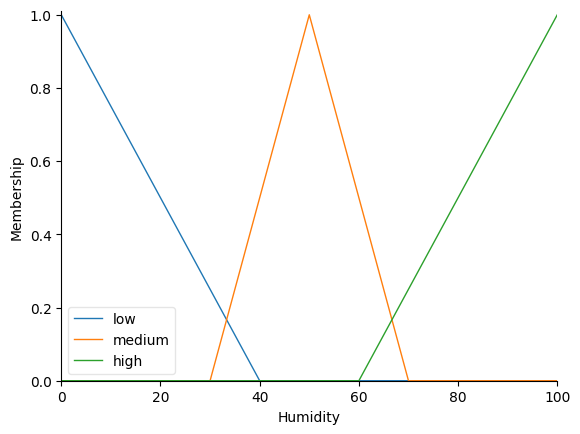

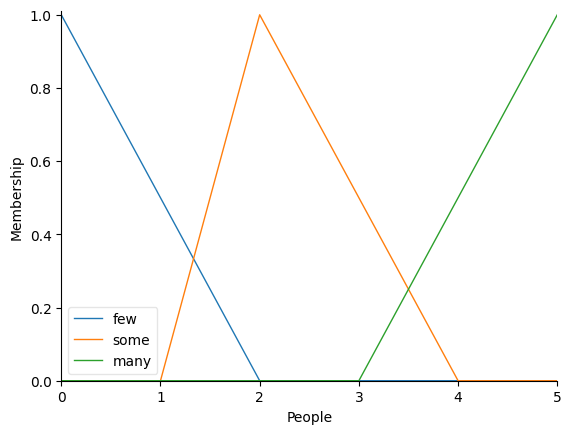

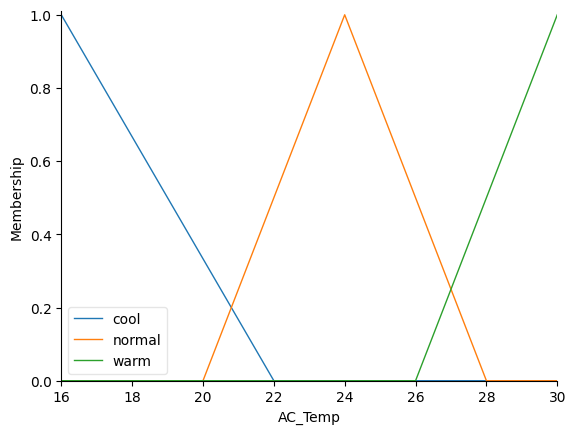

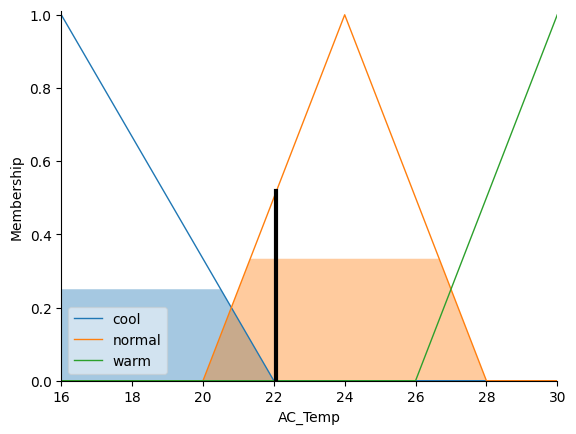

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# إنشاء المتغيرات الضبابية
temperature = ctrl.Antecedent(np.arange(20, 51, 1), 'Temperature')  # من 20 إلى 50 درجة
humidity = ctrl.Antecedent(np.arange(0, 101, 5), 'Humidity')        # من 0% إلى 100%
people = ctrl.Antecedent(np.arange(0, 6, 1), 'People')              # من 0 إلى 5 أشخاص
ac_temperature = ctrl.Consequent(np.arange(16, 31, 1), 'AC_Temp')   # من 16 إلى 30 درجة

# تعريف الدوال الضبابية للمدخلات والمخرجات
# درجة الحرارة
temperature['cold'] = fuzz.trimf(temperature.universe, [20, 20, 28])
temperature['warm'] = fuzz.trimf(temperature.universe, [28, 34, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [34, 50, 50])

# الرطوبة
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

# عدد الأشخاص
people['few'] = fuzz.trimf(people.universe, [0, 0, 2])
people['some'] = fuzz.trimf(people.universe, [1, 2, 4])
people['many'] = fuzz.trimf(people.universe, [3, 5, 5])

# درجة حرارة التكييف
ac_temperature['cool'] = fuzz.trimf(ac_temperature.universe, [16, 16, 22])
ac_temperature['normal'] = fuzz.trimf(ac_temperature.universe, [20, 24, 28])
ac_temperature['warm'] = fuzz.trimf(ac_temperature.universe, [26, 30, 30])

# رسم الدوال
temperature.view()
humidity.view()
people.view()
ac_temperature.view()

# إنشاء القواعد
rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], ac_temperature['warm'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['high'], ac_temperature['normal'])
rule3 = ctrl.Rule(temperature['warm'] & humidity['low'], ac_temperature['normal'])
rule4 = ctrl.Rule(temperature['warm'] & humidity['medium'], ac_temperature['normal'])
rule5 = ctrl.Rule(temperature['hot'] & humidity['medium'], ac_temperature['cool'])
rule6 = ctrl.Rule(temperature['hot'] & humidity['high'], ac_temperature['cool'])
rule7 = ctrl.Rule(people['many'], ac_temperature['cool'])
rule8 = ctrl.Rule(people['few'] & temperature['cold'], ac_temperature['warm'])

# إنشاء نظام التحكم
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

# إدخال قيم مثال
ac_sim.input['Temperature'] = 38
ac_sim.input['Humidity'] = 60
ac_sim.input['People'] = 3

# تشغيل النظام
ac_sim.compute()

# عرض النتيجة
print("درجة حرارة التكييف المقترحة:", ac_sim.output['AC_Temp'])
ac_temperature.view(sim=ac_sim)
plt.show()